# Digit Recognizer

Click [here](https://www.kaggle.com/c/digit-recognizer) for the competition overview.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Train Data

In [2]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


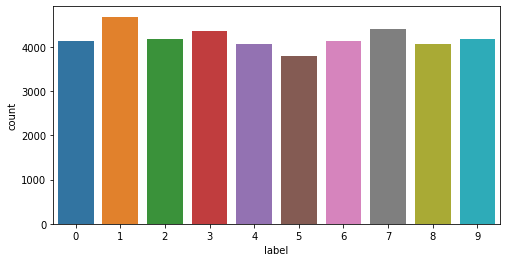

In [3]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=data);

In [4]:
# Normalization of features
# Would be the same as features/255 in this case
scaler = MinMaxScaler()
features = data.drop('label', 1)
scaler.fit(features)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
X = scaler.transform(features)
y = data['label']

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [7]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (34020, 784)
y_train shape: (34020,)
X_test shape: (4200, 784)
y_test shape: (4200,)


## CNN building

In [8]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(32, 5, activation="relu", padding="same",
        input_shape=[28, 28, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64, 5, activation="relu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.4),
    
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

## Results

In [11]:
history = model.fit(X_train.reshape(-1,28,28,1), y_train, epochs=15,
                    validation_data=(X_val.reshape(-1,28,28,1), y_val))

Train on 34020 samples, validate on 3780 samples
Epoch 1/15
34020/34020 [==============================] - 97s 3ms/sample - loss: 0.3974 - accuracy: 0.8810 - val_loss: 0.0720 - val_accuracy: 0.9765
Epoch 2/15
34020/34020 [==============================] - 76s 2ms/sample - loss: 0.1625 - accuracy: 0.9521 - val_loss: 0.0708 - val_accuracy: 0.9780
Epoch 3/15
34020/34020 [==============================] - 75s 2ms/sample - loss: 0.1284 - accuracy: 0.9633 - val_loss: 0.0419 - val_accuracy: 0.9873
Epoch 4/15
34020/34020 [==============================] - 75s 2ms/sample - loss: 0.1040 - accuracy: 0.9709 - val_loss: 0.0364 - val_accuracy: 0.9878
Epoch 5/15
34020/34020 [==============================] - 76s 2ms/sample - loss: 0.0917 - accuracy: 0.9740 - val_loss: 0.0449 - val_accuracy: 0.9862
Epoch 6/15
34020/34020 [==============================] - 76s 2ms/sample - loss: 0.0927 - accuracy: 0.9737 - val_loss: 0.0358 - val_accuracy: 0.9889
Epoch 7/15
34020/34020 [==============================] -

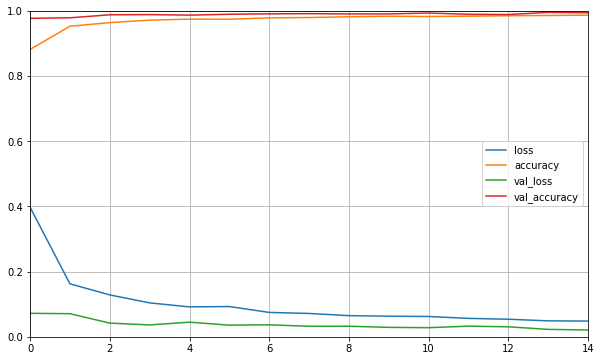

In [12]:
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test.reshape(-1,28,28,1), y_test)

4200/4200 [==============================] - 3s 652us/sample - loss: 0.0470 - accuracy: 0.9893


[0.0470410995423992, 0.9892857]

In [14]:
y_pred = model.predict_classes(X_test.reshape(-1,28,28,1))

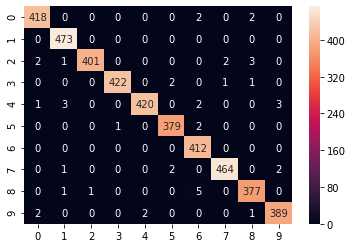

In [17]:
confusion_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mtx, annot=True, fmt='d')

## Test Data

In [18]:
# Loading
testdata = pd.read_csv("test.csv")
testdata.shape # No label

(28000, 784)

In [20]:
# Apply transformer
testfeatures = scaler.transform(testdata)

In [21]:
# Predict labels
y_pred = model.predict_classes(testfeatures.reshape(-1,28,28,1))

In [22]:
# Writing submission for Kaggle Competition
submission = pd.DataFrame({
    'ImageId': list(range(1,28001)),
    'Label': y_pred.tolist()
})


submission.to_csv('submission.csv', header = True, index = False)